In [1]:
!pip install lyricsgenius

     |████████████████████████████████| 92kB 5.8MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [2]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

# Get lyrics from Genius API

In [3]:
import lyricsgenius
genius = lyricsgenius.Genius("")
artist = genius.search_artist("The Beatles", max_songs=1, sort="title")
songs = artist.songs

Searching for songs by The Beatles...

Song 1: "12-Bar Original"

Reached user-specified song limit (1).
Done. Found 1 songs.


In [4]:
all_lyrics = []
lyrics_index = 0
counted_lyrics = 0
songs_names = ["A Day in the Life", "Strawberry Fields Forever", "Penny Lane", "She Loves You", "Please Please Me", "Dear Prudence",
               "Here, There and Everywhere", "Norwegian Wood (This Bird Has Flown)", "Eleanor Rigby", "Rain", "She Said, She Said",
               "Tomorrow Never Knows", "Something", "Money (That’s What I Want)", "Let It Be", "Here Comes the Sun", "Nowhere Man",
               "Ticket to Ride", "Lovely Rita", "Hey Jude", "I Saw Her Standing There", "You Never Give Me Your Money", "Sun King",
               "Mean Mr. Mustard", "Polythene Pam", "She Came in Through the Bathroom Window", "Golden Slumbers", "Carry That Weight",
               "The End", "Day Tripper", "Blackbird", "While My Guitar Gently Weeps", "And Your Bird Can Sing", "For No One", "I Am the Walrus",
               "Help!", "I’ll Cry Instead", "Drive My Car", "Yesterday", "Paperback Writer", "A Hard Day’s Night", "In My Life", "Twist and Shout",
               "Come Together", "The Long and Winding Road", "You’ve Got to Hide Your Love Away", "Back in the U.S.S.R.", "Sgt. Pepper’s Lonely Hearts Club Band (Reprise)",
               "I Want to Hold Your Hand", "Julia", "There’s a Place", "Within You Without You", "You Can’t Do That", "I Will", "Can’t Buy Me Love", "Revolution",
               "You’re Going to Lose That Girl", "Lady Madonna", "One After 909", "Sexy Sadie", "Girl", "If I Fell", "I Feel Fine", "All You Need Is Love",
               "Boys", "Hello, Goodbye", "Please Mister Postman", "Lucy in the Sky With Diamonds", "I Want to Tell You", "Michelle", "You Won’t See Me",
               "Act Naturally", "Things We Said Today", "Love You To", "Magical Mystery Tour", "I’m So Tired", "The Night Before", "And I Love Her",
               "Cry Baby Cry", "Eight Days a Week", "I Wanna Be Your Man", "Sgt. Pepper’s Lonely Hearts Club Band", "If I Needed Someone", "I’m Only Sleeping",
               "This Boy", "With a Little Help From My Friends", "Yer Blues", "Run for Your Life", "Hey Bulldog", "Slow Down", "I’m Down", "All My Loving",
               "Across the Universe", "Maggie Mae", "Got to Get You Into My Life", "Getting Better", "I’m Looking Through You", "Flying", "I Me Mine", 
               "From Me to You"]
import time
trigger = False
while counted_lyrics < 100 or trigger==True:
  try:
    song = genius.search_song(songs_names[lyrics_index], artist.name)
    if song == None:
      time.sleep(5)
      print("Sleeping 5 secs")
      song = genius.search_song(songs_names[lyrics_index], artist.name)
      if song != None:
        counted_lyrics += 1
        print("Total lyrics: " + str(counted_lyrics))
        lyrics = song.lyrics.split("\n")
        lyrics = [x for x in lyrics if x]
        all_lyrics = all_lyrics + lyrics
    else:
        counted_lyrics += 1
        print("Total lyrics: " + str(counted_lyrics))
        lyrics = song.lyrics.split("\n")
        lyrics = [x for x in lyrics if x]
        all_lyrics = all_lyrics + lyrics
  except:
    pass
  lyrics_index += 1
  if lyrics_index == 99:
    trigger = True

Searching for "A Day in the Life" by The Beatles...
Done.
Total lyrics: 1
Searching for "Strawberry Fields Forever" by The Beatles...
Done.
Total lyrics: 2
Searching for "Penny Lane" by The Beatles...
Done.
Total lyrics: 3
Searching for "She Loves You" by The Beatles...
Done.
Total lyrics: 4
Searching for "Please Please Me" by The Beatles...
Done.
Total lyrics: 5
Searching for "Dear Prudence" by The Beatles...
Done.
Total lyrics: 6
Searching for "Here, There and Everywhere" by The Beatles...
Done.
Total lyrics: 7
Searching for "Norwegian Wood (This Bird Has Flown)" by The Beatles...
Done.
Total lyrics: 8
Searching for "Eleanor Rigby" by The Beatles...
Done.
Total lyrics: 9
Searching for "Rain" by The Beatles...
Done.
Total lyrics: 10
Searching for "She Said, She Said" by The Beatles...
Done.
Total lyrics: 11
Searching for "Tomorrow Never Knows" by The Beatles...
Done.
Total lyrics: 12
Searching for "Something" by The Beatles...
Done.
Total lyrics: 13
Searching for "Money (That’s What I

KeyboardInterrupt: ignored

# Tokenize all possible words

In [5]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_lyrics)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

{'you': 1, 'i': 2, 'the': 3, 'to': 4, 'me': 5, 'a': 6, 'and': 7, 'verse': 8, 'love': 9, 'na': 10, 'my': 11, 'that': 12, 'yeah': 13, 'it': 14, 'in': 15, 'know': 16, 'be': 17, 'lennon': 18, 'mccartney': 19, 'john': 20, 'all': 21, 'chorus': 22, "i'm": 23, 'paul': 24, 'of': 25, 'your': 26, 'she': 27, '1': 28, '2': 29, 'on': 30, 'is': 31, 'her': 32, 'want': 33, "don't": 34, 'when': 35, 'can': 36, 'oh': 37, 'girl': 38, 'down': 39, 'so': 40, "it's": 41, '3': 42, 'say': 43, 'with': 44, 'what': 45, 'baby': 46, 'see': 47, 'for': 48, 'if': 49, 'bridge': 50, 'come': 51, 'but': 52, 'got': 53, 'let': 54, 'no': 55, 'gonna': 56, 'like': 57, 'do': 58, "you're": 59, 'better': 60, 'up': 61, 'little': 62, 'now': 63, "she's": 64, "i'll": 65, 'tit': 66, 'hey': 67, 'time': 68, "can't": 69, 'will': 70, 'man': 71, "that's": 72, 'was': 73, 'get': 74, 'there': 75, 'outro': 76, 'need': 77, 'harrison': 78, 'one': 79, 'said': 80, 'make': 81, 'well': 82, 'out': 83, 'george': 84, 'mine': 85, 'yes': 86, 'ah': 87, 'min

# Number of keywords to labels

In [6]:
input_sequences = []
for word_sequence in all_lyrics:
	token_list = tokenizer.texts_to_sequences([word_sequence])[0]
	for i in range(1, len(token_list)):
		nth_sequence = token_list[:i+1]
		input_sequences.append(nth_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

# Implement LSTM to predict sequence of words

In [8]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(200)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=1000, verbose=1)
#print model.summary()
print(model)


Epoch 1/1000
535/535 [==============================] - 5s 9ms/step - loss: 6.2011 - accuracy: 0.0393
Epoch 2/1000
535/535 [==============================] - 5s 9ms/step - loss: 5.7884 - accuracy: 0.0432
Epoch 3/1000
535/535 [==============================] - 5s 9ms/step - loss: 5.5752 - accuracy: 0.0554
Epoch 4/1000
535/535 [==============================] - 5s 9ms/step - loss: 5.4190 - accuracy: 0.0620
Epoch 5/1000
535/535 [==============================] - 5s 9ms/step - loss: 5.2837 - accuracy: 0.0829
Epoch 6/1000
535/535 [==============================] - 5s 9ms/step - loss: 5.1594 - accuracy: 0.0991
Epoch 7/1000
535/535 [==============================] - 5s 9ms/step - loss: 5.0420 - accuracy: 0.1057
Epoch 8/1000
535/535 [==============================] - 5s 9ms/step - loss: 4.9510 - accuracy: 0.1112
Epoch 9/1000
535/535 [==============================] - 5s 9ms/step - loss: 4.8649 - accuracy: 0.1179
Epoch 10/1000
535/535 [==============================] - 5s 9ms/step - loss: 4.791

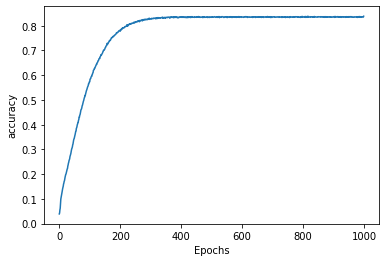

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.xlabel("Epochs")
plt.ylabel('accuracy')
plt.show()

# Recreate Beatles Song

In [13]:
initial_words = "I'm in love with her"
predicted_number_of_words = 20
  
for _ in range(predicted_number_of_words):
	token_list = tokenizer.texts_to_sequences([initial_words])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	predicted_individual_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			predicted_individual_word = word
			break
	initial_words += " " + predicted_individual_word
print(initial_words)

I'm in love with her and i feel fine there by there did you flat come it will be come come sun found an pocket
